# Carpenter Code  - Solid Methane Defect Recombination

Based on Carpenter's model as shown in - Kirichek, O., Lawson, C., Draper, G., Jenkins, D., Haynes, D. and Lilley, S., 2020. Solid methane moderators: Thermodynamics and chemistry. Journal of Neutron Research, 22(2-3), pp.281-286.

- Code adapted from a Matlab script by C.Lawson 

In [21]:
import matplotlib.pyplot as plt
import numpy as np
Kb = 1.38064852e-23

### First Recombination

In [31]:
start_number_1 = 6.0e-2
production_rate_1 = 0
heat_released_per_recomb_1 = 218e3
Ea_1 = 15.0e-22
recomb_at_infinite_temp_1 = 380000/3600

activation_temp_1 = Ea_1/Kb

N_1 = []
N_squared_1 = []
K_1 = []
N_1.append(start_number_1)
N_squared_1.append(N_1[0]**2)
K_1.append(0)
R_1 = production_rate_1

epsilon_1 = heat_released_per_recomb_1

DeltaE_1 = Ea_1
K_0_1 = recomb_at_infinite_temp_1
Q = []
Q.append(0)

### Second Recombination

In [32]:
start_number_2 = 1.4e-1
production_rate_2 = 0
heat_released_per_recomb_2 = 310e3
Ea_2 = 32.5000000e-22
recomb_at_infinite_temp_2 = 25000.0/3600

activation_temp_2 = Ea_2/Kb

N_2 = []
N_squared_2 = []
K_2 = []
N_2.append(start_number_2)
N_squared_2.append(N_2[0]**2)
K_2.append(0)
R_2 = production_rate_2

epsilon_2 = heat_released_per_recomb_2

DeltaE_2 = Ea_2
K_0_2 = recomb_at_infinite_temp_2


### Setup

In [33]:
system_start_temp = 10
mass = 15.0
specific_heat = 1
heat_transfer_aoverl = 1.0
external_heating_power = 0
coolant_temp = 9

methane_vol = []
methane_vol.append(20e-2*20e-2*5e-2)

T = []
time = []
deltaT = []
test_var = []
test_var.append(0)

N_total = []
N_total = N_1 + N_2

T.append(system_start_temp)
time.append(0)

MCdT = 0

M = mass
C = specific_heat
P = external_heating_power
aoverl = heat_transfer_aoverl
Tcool = coolant_temp


### Reading in the files

In [34]:
#Methane heat capacity 
Cx = np.genfromtxt('Methane_Heat_Cap.dat', delimiter = '\t', skip_header = 1, usecols =(0))
Cy = np.genfromtxt('Methane_Heat_Cap.dat', delimiter = '\t', skip_header = 1, usecols =(1))

#Methane thermal conductivity 
Hx = np.genfromtxt('Methane_thermal_cond.dat', delimiter = '\t', skip_header = 1, usecols =(0))
Hy = np.genfromtxt('Methane_thermal_cond.dat', delimiter = '\t', skip_header = 1, usecols =(1))

#Methane volume expansion (not actually sure if i need this but ill delete it later if not) 
therm_ex_x = np.genfromtxt('Volume_expansion_CH4.dat', delimiter = '\t', skip_header = 1, usecols =(0))
therm_ex_y = np.genfromtxt('Volume_expansion_CH4.dat', delimiter = '\t', skip_header = 1, usecols =(1))

#Carpenter data 
carpenter_x = np.genfromtxt('Carpenter_Nature_2.dat', delimiter = '\t', usecols =(0))
carpenter_y = np.genfromtxt('Carpenter_Nature_2.dat', delimiter = '\t', usecols =(1))

#TS2 data
TS2_x = np.genfromtxt('TS2_Data.dat', delimiter = '\t', usecols =(0))
TS2_y = np.genfromtxt('TS2_Data.dat', delimiter = '\t', usecols =(1))

#Heater file data 
heater_x = np.genfromtxt('Heater_file_1.dat', delimiter = '\t', skip_header = 2, usecols =(0))
heater_y = np.genfromtxt('Heater_file_1.dat', delimiter = '\t', skip_header = 2, usecols =(1))


### Setting up Integral

#### For One Recombination

In [35]:
i = 0
t_step = 0.1

C_interp = np.interp([T[0]], Cx, Cy)
H_interp = np.interp([T[0]], Hx, Hy)

K_1x = K_0_1 * np.exp(-DeltaE_1/(Kb*T[0]))
K_1.append(K_1x)
K_2x = K_0_2 * np.exp(-DeltaE_2/(Kb*T[0]))
K_2.append(K_2x)


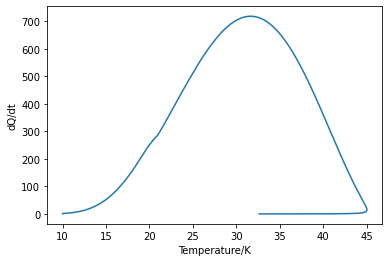

In [36]:
while i < 6200:
    t = time[i] + t_step
    time.append(t)
    
    C_interp = np.interp([T[i]], Cx, Cy)           
    H_interp = np.interp([T[i]], Hx, Hy)           
    
    P = 0.2
    
    N_1a = R_1*t_step - K_1[i]*t_step*N_1[i]**2 + N_1[i]
    N_1.append(N_1a)
    
    Temp = (1/(M*C_interp) * (P*t_step + (epsilon_1*K_1[i]*t_step*N_1a**2) - aoverl*H_interp*t_step*(T[i]-Tcool)) ) + T[i]
    T.append(Temp)
    
    Qa = (epsilon_1*K_1[i]*t_step*N_1a**2)/t_step
    Q.append(Qa)

    K_1a = K_0_1 * np.exp(-DeltaE_1/(Kb*Temp))
    K_1.append(K_1a)
    
    i = i + 1

plt.plot (T, Q)
plt.xlabel('Temperature/K')
plt.ylabel('dQ/dt')
plt.show

N_1.clear()
T.clear()
Q.clear()
K_1.clear()

#### For Both Recombinations

In [28]:
i = 0
t_step = 0.1
T.append(system_start_temp)
time.append(0)
Q.append(0)
N_1.append(start_number_1)
K_1.append(0)

<function matplotlib.pyplot.show(*args, **kw)>

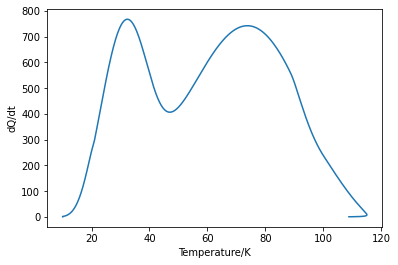

In [29]:

while i < 9000:
    t = time[i] + t_step
    time.append(t)
    
    C_interp = np.interp([T[i]], Cx, Cy)           
    H_interp = np.interp([T[i]], Hx, Hy)          
    
    P = 0.2
    
    N_1a = R_1*t_step - K_1[i]*t_step*N_1[i]**2 + N_1[i]
    N_1.append(N_1a)
    N_2a = R_2*t_step - K_2[i]*t_step*N_2[i]**2 + N_2[i]
    N_2.append(N_2a)
    
    Temp = (1/(M*C_interp) * (P*t_step + (epsilon_1*K_1[i]*t_step*N_1a**2) + (epsilon_2*K_2[i]*t_step*N_2a**2) - aoverl*H_interp*t_step*(T[i]-Tcool)) ) + T[i]
    T.append(Temp)
    
    Qa = ((epsilon_1*K_1[i]*t_step*N_1a**2) + (epsilon_2*K_2[i]*t_step*N_2a**2)) /t_step
    Q.append(Qa)

    K_1a = K_0_1 * np.exp(-DeltaE_1/(Kb*Temp))
    K_1.append(K_1a)
    K_2a = K_0_2 * np.exp(-DeltaE_2/(Kb*Temp))
    K_2.append(K_2a)
    
    i = i + 1

plt.plot (T, Q)
plt.xlabel('Temperature/K')
plt.ylabel('dQ/dt')
plt.show